# Spam Detection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
df = pd.read_csv(r'spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Exploratory Data Analysis

In [7]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
df['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

<AxesSubplot:xlabel='v1', ylabel='count'>

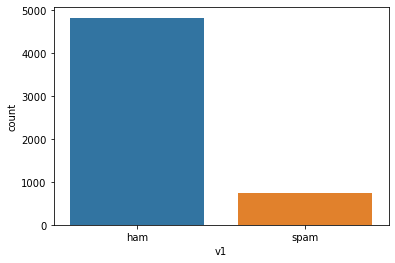

In [9]:
sns.countplot(x='v1', data=df)

In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preparation - Split the data into train and test set

In [12]:
y = df['v1']
X = df[['v2']]

In [13]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,v2
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...


In [15]:
X_train.shape

(4457, 1)

### Data Prepration - Text Preprocessing

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [18]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [20]:
# !pip install tqdm

In [21]:
from tqdm import tqdm, tqdm_notebook

In [22]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [23]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['v2'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4457/4457 [00:41<00:00, 106.49it/s]


,0,1
1978,boat still mom check yo half nake,7
3989,bank granit issu strong buy explos pick member...,12
3935,r give second chanc rahul dengra,6
4078,play smash bro lt gt religi,6
4086,privat account statement show un redeem point ...,11


In [24]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
1978,boat still mom check yo half nake,7
3989,bank granit issu strong buy explos pick member...,12
3935,r give second chanc rahul dengra,6
4078,play smash bro lt gt religi,6
4086,privat account statement show un redeem point ...,11


In [25]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,v2,clean_text_stem,text_length_stem
1978,No I'm in the same boat. Still here at my moms...,boat still mom check yo half nake,7
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,bank granit issu strong buy explos pick member...,12
3935,They r giving a second chance to rahul dengra.,r give second chanc rahul dengra,6
4078,O i played smash bros &lt;#&gt; religiously.,play smash bro lt gt religi,6
4086,PRIVATE! Your 2003 Account Statement for 07973...,privat account statement show un redeem point ...,11


In [26]:
temp_df = X_train['v2'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4457/4457 [00:44<00:00, 101.29it/s]


,0,1
1978,boat still mom check yo half naked,7
3989,bank granite issue strong buy explosive pick m...,12
3935,r giving second chance rahul dengra,6
4078,played smash bros lt gt religiously,6
4086,private account statement show un redeemed poi...,11


In [27]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1978,boat still mom check yo half naked,7
3989,bank granite issue strong buy explosive pick m...,12
3935,r giving second chance rahul dengra,6
4078,played smash bros lt gt religiously,6
4086,private account statement show un redeemed poi...,11


In [28]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,v2,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
1978,No I'm in the same boat. Still here at my moms...,boat still mom check yo half nake,7,boat still mom check yo half naked,7
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,bank granit issu strong buy explos pick member...,12,bank granite issue strong buy explosive pick m...,12
3935,They r giving a second chance to rahul dengra.,r give second chanc rahul dengra,6,r giving second chance rahul dengra,6
4078,O i played smash bros &lt;#&gt; religiously.,play smash bro lt gt religi,6,played smash bros lt gt religiously,6
4086,PRIVATE! Your 2003 Account Statement for 07973...,privat account statement show un redeem point ...,11,private account statement show un redeemed poi...,11


## Converting Text to Numerical vectors - BOW Representation


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [30]:
X_train_bow

<4457x6265 sparse matrix of type '<class 'numpy.int64'>'
	with 35900 stored elements in Compressed Sparse Row format>

In [31]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 6265
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4457, 6265)


In [32]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse.csr.csr_matrix'>
48 Bytes


In [34]:
from sys import getsizeof

print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()), "Bytes")

<class 'numpy.ndarray'>
223384960 Bytes


## Preprocessing the Test Data

In [35]:
X_test.head()

,v2
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,I sent my scores to sophas and i had to do sec...
1044,We know someone who you know that fancies you....
2484,Only if you promise your getting out as SOON a...
812,Congratulations ur awarded either å£500 of CD ...


In [36]:
temp_df = X_test['v2'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1115/1115 [00:10<00:00, 102.86it/s]


,0,1
3245,funny fact nobody teach volcano erupt tsunami ...,18
944,sent score sophas secondary application school...,20
1044,know someone know fancy call find pobox l hb p,10
2484,promise getting soon text morning let know mad...,9
812,congratulation ur awarded either cd gift vouch...,20


In [37]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
3245,funny fact nobody teach volcano erupt tsunami ...,18
944,sent score sophas secondary application school...,20
1044,know someone know fancy call find pobox l hb p,10
2484,promise getting soon text morning let know mad...,9
812,congratulation ur awarded either cd gift vouch...,20


In [38]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,v2,clean_text_lemma,text_length_lemma
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t...",funny fact nobody teach volcano erupt tsunami ...,18
944,I sent my scores to sophas and i had to do sec...,sent score sophas secondary application school...,20
1044,We know someone who you know that fancies you....,know someone know fancy call find pobox l hb p,10
2484,Only if you promise your getting out as SOON a...,promise getting soon text morning let know mad...,9
812,Congratulations ur awarded either å£500 of CD ...,congratulation ur awarded either cd gift vouch...,20


In [39]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [41]:
y_test_pred = classifier.predict(X_test_bow)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9775784753363229
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [44]:
y_test_pred = classifier.predict(X_test_bow)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9713004484304932
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.94      0.84      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

RandomForestClassifier()

In [47]:
y_test_pred = classifier.predict(X_test_bow)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9757847533632287
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

